## Treliça de três barras

O objetivo do problema de otimização restrita é minimizar o gasto de material de uma treliça de três barras. Sendo que $x_1 = A_1$ é o tamanho das barras laterais e $x_2 = A_2$ é o tamanho da barra central. A função objetivo é o comprimento total das barras:

$$
\min{f(x_1, x_2)} = (2\sqrt{2})x_1 + x_2
$$

As restrições impostas ao problema são:

1. Estresse máximo das barras 1 e 2
$$
P \frac{x_2 + x_1 \sqrt{2}}{x_1^2 \sqrt{2} + 2x_1 x_2} \leq 20
$$

$$
P \frac{1}{x_1 + x_2 \sqrt{2}} \leq 20
$$

2. Estresse mínimo para a barra 3

$$
-P \frac{x_2}{x_1^2 \sqrt{2} + 2x_1 x_2} \leq -5
$$

4. Limites de tamanho para as barras

$$
0.1 \leq x_1, x_2 \leq 5
$$

 ==== Penalidade Exterior ==== 


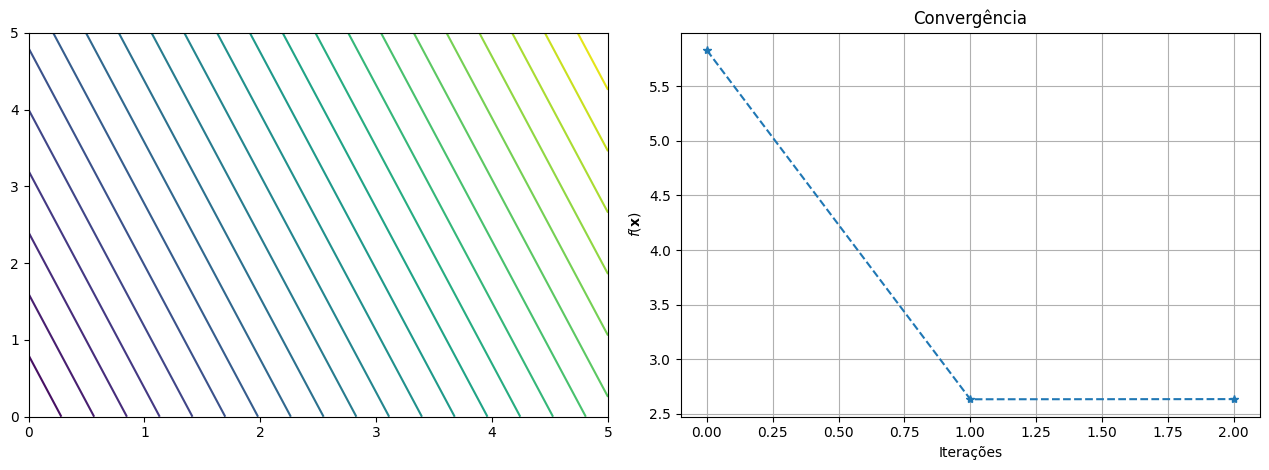

Solução ótima: [0.78695265 0.40735474]
Número de iterações: 2
Número de avaliações: 13072
Valor da função objetivo: 2.6361
 ==== Penalidade Interior ==== 


/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:36: RuntimeWarning: overflow encountered in scalar add
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:58: RuntimeWarning: overflow encountered in scalar add
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:36: RuntimeWarning: overflow encountered in scalar power
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:58: RuntimeWarning: overflow encountered in scalar power
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:36: RuntimeWarning: overflow encountered in scalar multiply
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.

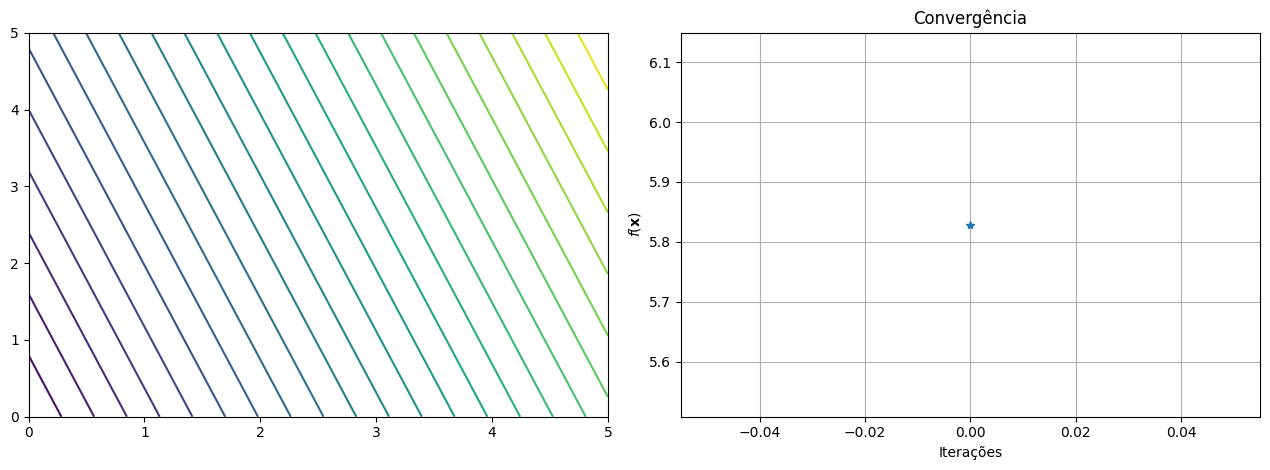

Solução ótima: [1. 3.]
Número de iterações: 0
Número de avaliações: 1788
Valor da função objetivo: 5.8284
 ==== Lagrangeano Aumentado ==== 


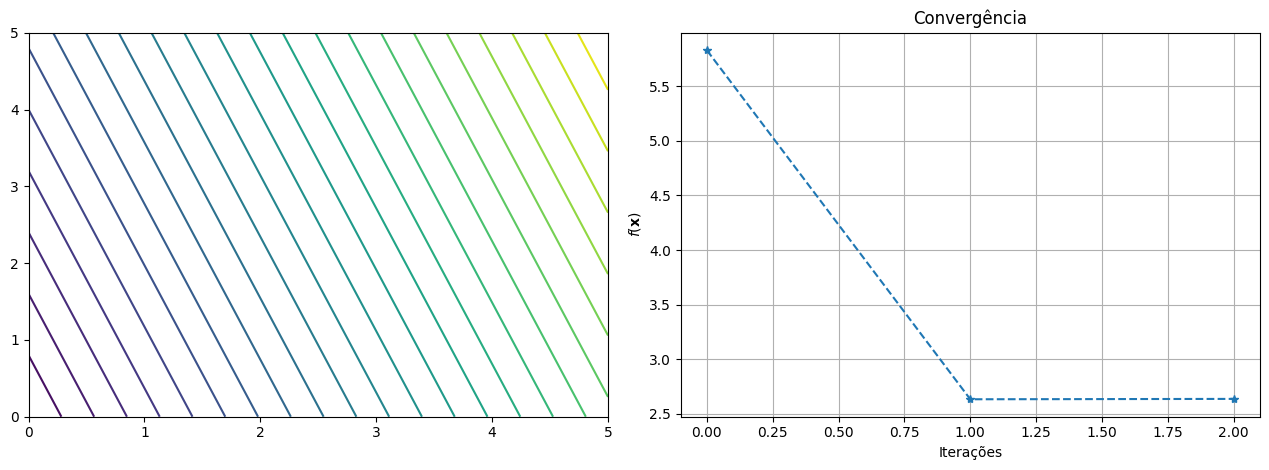

Solução ótima: [0.78759659 0.407673  ]
Número de iterações: 2
Número de avaliações: 13178
Valor da função objetivo: 2.6380
\begin{tabular}{lrrrrr}
\hline
 Método                &      x\_1 &      x\_2 &   f(x\_1, x\_2) &   Iterações &   Avaliações \\
\hline
 Penalidade Exterior   & 0.786953 & 0.407355 &       2.63607 &           2 &        13072 \\
 Penalidade Interior   & 1        & 3        &       5.82843 &           0 &         1788 \\
 Lagrangeano Aumentado & 0.787597 & 0.407673 &       2.63804 &           2 &        13178 \\
\hline
\end{tabular}


In [1]:
import numpy as np
import math
import tabulate

import otimo

def print_solution(sol: otimo.Solution):
    print(f"Resultado: x = {sol.x}, f(x) = {sol.fx}, iterações = {sol.iter}, aval = {sol.aval}")
    print(f"critério de parada {sol.criterio_parada}")

""" Constants """

P = 20
sqrt_2 = math.sqrt(2)

""" Range Definitions """

x1_range = (0.1, 5)
x2_range = (0.1, 5)


""" Objective Function """


def objective(x):
    x1, x2 = x
    return (2 * math.sqrt(2)) * x1 + x2


""" Constraint Functions """


def g_1(x):
    x1, x2 = x
    numerator = x2 + x1 * sqrt_2
    denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)

    # Handle potential division by zero
    if denominator == 0:
        return float("inf")

    return P * (numerator / denominator) - 20


def g_2(x):
    x1, x2 = x
    denominator = x1 + x2 * sqrt_2

    if denominator == 0:
        return float("inf")

    return P / denominator - 20


def g_3(x):
    x1, x2 = x
    numerator = -P * x2
    denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)

    if denominator == 0:
        return float("inf")

    return (numerator / denominator) + 5


restrictions = [g_1, g_2, g_3]
tipos_de_restricoes = ["<", "<", "<"]
x0 = np.array([1.0, 3.0])  # Initial guess

busca_1d = otimo.SecaoAurea(precisao=1e-6)
irrestrito = otimo.Gradiente(busca_1d, precisao=1e-6, diferenca="regressiva")

metodos = {
    "Penalidade Exterior": otimo.PenalidadeExterior(),
    "Penalidade Interior": otimo.PenalidadeInterior(),
    "Lagrangeano Aumentado": otimo.LagrangeanoAumentado(),
}

resultados_1 = []


for nome, metodo in metodos.items():
    print(f" ==== {nome} ==== ")
    resultado = metodo.resolva(objective, x0,  restrictions, tipos_de_restricoes, irrestrito, disp=False)
    resultado.resultados(objective, [0, 5], [0,5], 30)
    print(resultado)
    resultados_1.append([nome, resultado.x[0], resultado.x[1], resultado.fx, resultado.iter, resultado.aval]);

headers = ["Método", "x_1", "x_2", "f(x_1, x_2)", "Iterações", "Avaliações"]
print(tabulate.tabulate(resultados_1, tablefmt="latex", headers=headers))


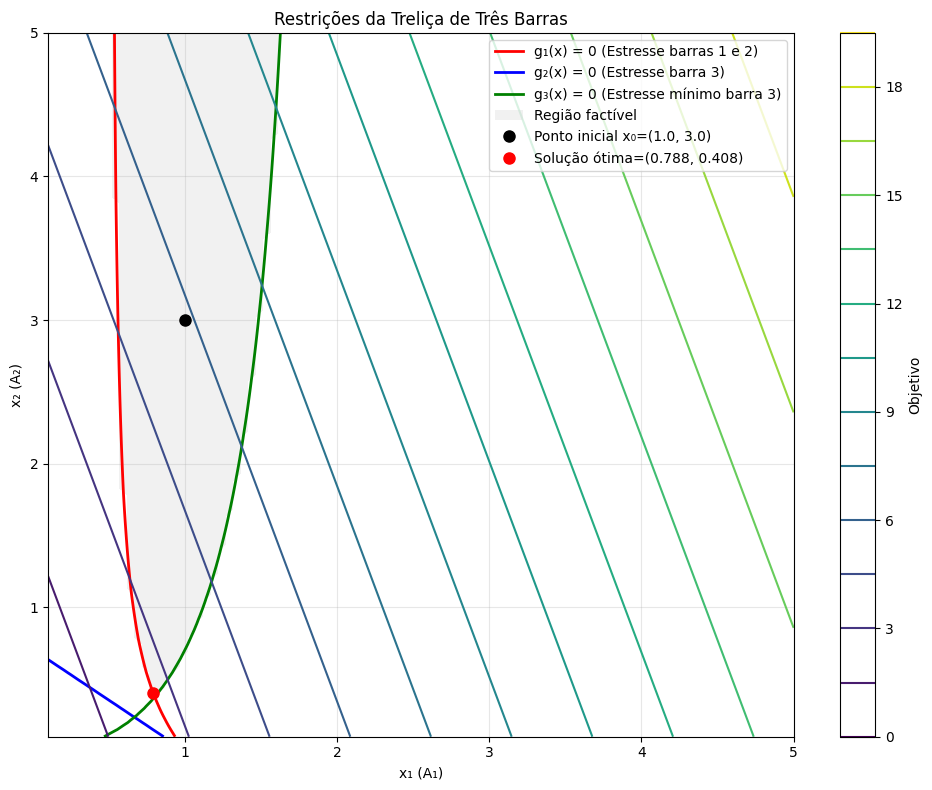

In [2]:

import matplotlib.pyplot as plt

# Create a grid of x1 and x2 values
x1 = np.linspace(0.1, 5, 100)
x2 = np.linspace(0.1, 5, 100)
X1, X2 = np.meshgrid(x1, x2)

# Calculate constraint values for each point in the grid
G1 = np.zeros_like(X1)
G2 = np.zeros_like(X1)
G3 = np.zeros_like(X1)

O = np.zeros_like(X1)

for i in range(100):
    for j in range(100):
        x = [X1[j, i], X2[j, i]]
        G1[j, i] = g_1(x)
        G2[j, i] = g_2(x)
        G3[j, i] = g_3(x)
        O[j, i] = objective(x)


# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot constraint boundaries (where g(x) = 0)
contour1 = ax.contour(X1, X2, G1, levels=[0], colors='red', linestyles='-', linewidths=2)
contour2 = ax.contour(X1, X2, G2, levels=[0], colors='blue', linestyles='-', linewidths=2)
contour3 = ax.contour(X1, X2, G3, levels=[0], colors='green', linestyles='-', linewidths=2)

obj_contour = ax.contour(X1, X2, O, levels=15)

# Fill feasible regions (where all constraints are satisfied)
feasible = (G1 <= 0) & (G2 <= 0) & (G3 <= 0)
ax.contourf(X1, X2, feasible.astype(int), levels=[0.5, 1.5], colors=['lightgray'], alpha=0.3)
# Add labels and formatting
ax.set_xlabel('x₁ (A₁)')
ax.set_ylabel('x₂ (A₂)')
ax.set_title('Restrições da Treliça de Três Barras')
ax.grid(True, alpha=0.3)

# Add legend
ax.plot([], [], 'r-', linewidth=2, label='g₁(x) = 0 (Estresse barras 1 e 2)')
ax.plot([], [], 'b-', linewidth=2, label='g₂(x) = 0 (Estresse barra 3)')
ax.plot([], [], 'g-', linewidth=2, label='g₃(x) = 0 (Estresse mínimo barra 3)')
ax.fill([], [], 'lightgray', alpha=0.3, label='Região factível')
ax.plot
ax.legend()

# Mark the initial point
ax.plot(x0[0], x0[1], 'ko', markersize=8, label=f'Ponto inicial x₀=({x0[0]}, {x0[1]})')

# Mark the optimal solution
ax.plot(resultado.x[0], resultado.x[1], 'ro', markersize=8, label=f'Solução ótima=({resultado.x[0]:.3f}, {resultado.x[1]:.3f})')

ax.legend()
plt.colorbar(obj_contour, label="Objetivo")
plt.tight_layout()
plt.show()

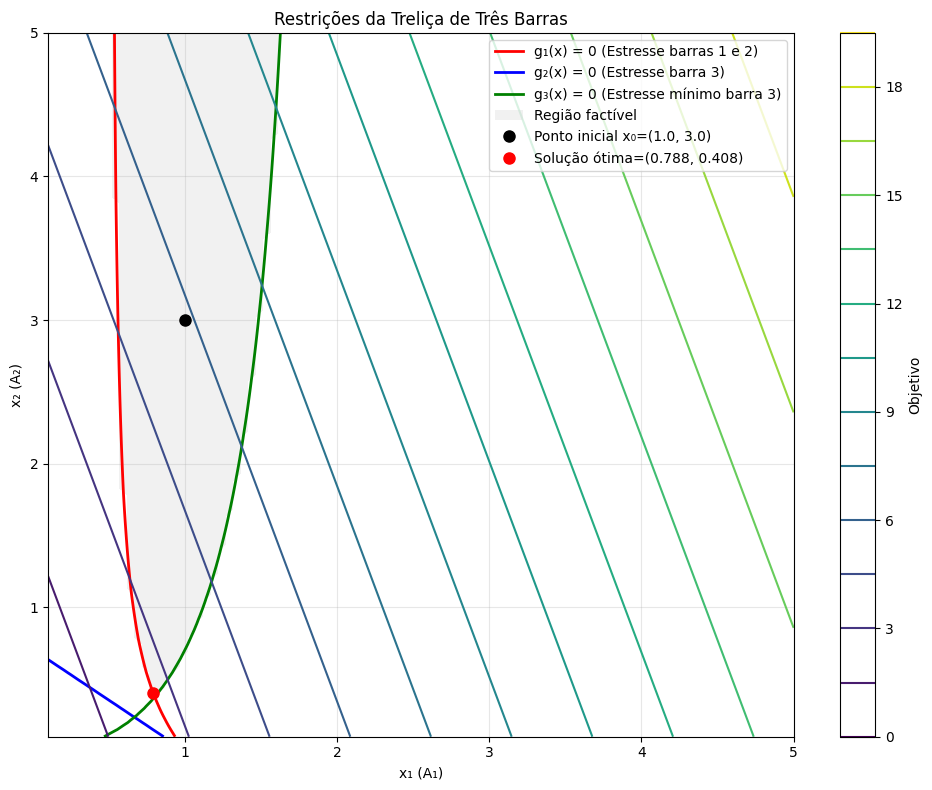

In [3]:

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

# Plot constraint boundaries (where g(x) = 0)
contour1 = ax.contour(X1, X2, G1, levels=[0], colors='red', linestyles='-', linewidths=2)
contour2 = ax.contour(X1, X2, G2, levels=[0], colors='blue', linestyles='-', linewidths=2)
contour3 = ax.contour(X1, X2, G3, levels=[0], colors='green', linestyles='-', linewidths=2)

obj_contour = ax.contour(X1, X2, O, levels=15)

# Fill feasible regions (where all constraints are satisfied)
feasible = (G1 <= 0) & (G2 <= 0) & (G3 <= 0)
ax.contourf(X1, X2, feasible.astype(int), levels=[0.5, 1.5], colors=['lightgray'], alpha=0.3)
# Add labels and formatting
ax.set_xlabel('x₁ (A₁)')
ax.set_ylabel('x₂ (A₂)')
ax.set_title('Restrições da Treliça de Três Barras')
ax.grid(True, alpha=0.3)

# Add legend
ax.plot([], [], 'r-', linewidth=2, label='g₁(x) = 0 (Estresse barras 1 e 2)')
ax.plot([], [], 'b-', linewidth=2, label='g₂(x) = 0 (Estresse barra 3)')
ax.plot([], [], 'g-', linewidth=2, label='g₃(x) = 0 (Estresse mínimo barra 3)')
ax.fill([], [], 'lightgray', alpha=0.3, label='Região factível')
ax.plot
ax.legend()

# Mark the initial point
ax.plot(x0[0], x0[1], 'ko', markersize=8, label=f'Ponto inicial x₀=({x0[0]}, {x0[1]})')

# Mark the optimal solution
ax.plot(resultado.x[0], resultado.x[1], 'ro', markersize=8, label=f'Solução ótima=({resultado.x[0]:.3f}, {resultado.x[1]:.3f})')

ax.legend()
plt.colorbar(obj_contour, label="Objetivo")
plt.tight_layout()
plt.show()

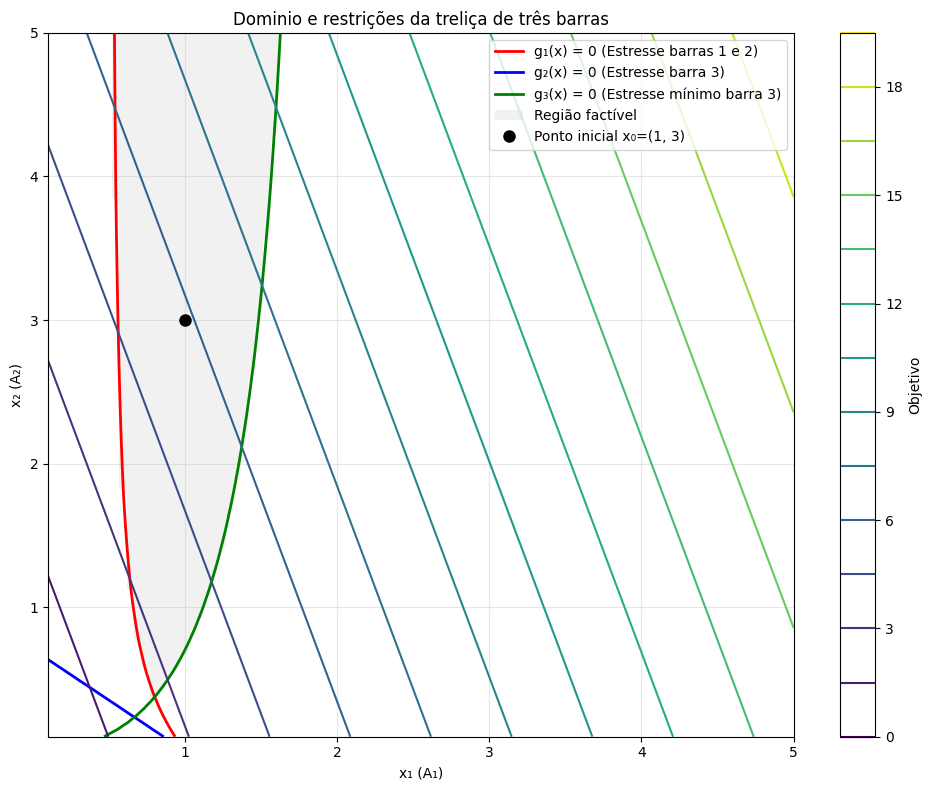

In [4]:

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

x0 = np.array([1, 3]);
# Plot constraint boundaries (where g(x) = 0)
contour1 = ax.contour(X1, X2, G1, levels=[0], colors='red', linestyles='-', linewidths=2)
contour2 = ax.contour(X1, X2, G2, levels=[0], colors='blue', linestyles='-', linewidths=2)
contour3 = ax.contour(X1, X2, G3, levels=[0], colors='green', linestyles='-', linewidths=2)

obj_contour = ax.contour(X1, X2, O, levels=15)

# Fill feasible regions (where all constraints are satisfied)
feasible = (G1 <= 0) & (G2 <= 0) & (G3 <= 0)
ax.contourf(X1, X2, feasible.astype(int), levels=[0.5, 1.5], colors=['lightgray'], alpha=0.3)
# Add labels and formatting
ax.set_xlabel('x₁ (A₁)')
ax.set_ylabel('x₂ (A₂)')
ax.set_title('Dominio e restrições da treliça de três barras')
ax.grid(True, alpha=0.3)

# Add legend
ax.plot([], [], 'r-', linewidth=2, label='g₁(x) = 0 (Estresse barras 1 e 2)')
ax.plot([], [], 'b-', linewidth=2, label='g₂(x) = 0 (Estresse barra 3)')
ax.plot([], [], 'g-', linewidth=2, label='g₃(x) = 0 (Estresse mínimo barra 3)')
ax.fill([], [], 'lightgray', alpha=0.3, label='Região factível')
ax.plot
ax.legend()

# Mark the initial point
ax.plot(x0[0], x0[1], 'ko', markersize=8, label=f'Ponto inicial x₀=({x0[0]}, {x0[1]})')

# Mark the optimal solution
# ax.plot(resultado.x[0], resultado.x[1], 'ro', markersize=8, label=f'Solução ótima=({resultado.x[0]:.3f}, {resultado.x[1]:.3f})')

ax.legend()
plt.colorbar(obj_contour, label="Objetivo")
plt.tight_layout()
plt.show()

/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:36: RuntimeWarning: overflow encountered in scalar add
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:58: RuntimeWarning: overflow encountered in scalar add
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:36: RuntimeWarning: overflow encountered in scalar multiply
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:58: RuntimeWarning: overflow encountered in scalar multiply
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:36: RuntimeWarning: overflow encountered in scalar power
  denominator = (x1**2 * sqrt_2) + (2 * x1 * x2)
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/14097018

[None, None, None]
[None, None, None]
[None, None, None]
[None, None, None]
[None, None, None]
[None, None, None]
[None, None, None]
[None, None, None]


/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:27: RuntimeWarning: overflow encountered in scalar multiply
  return (2 * math.sqrt(2)) * x1 + x2
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:27: RuntimeWarning: overflow encountered in scalar add
  return (2 * math.sqrt(2)) * x1 + x2
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:35: RuntimeWarning: overflow encountered in scalar multiply
  numerator = x2 + x1 * sqrt_2
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:42: RuntimeWarning: invalid value encountered in scalar divide
  return P * (numerator / denominator) - 20
/var/folders/9f/8yywz09n1p1114r4s3l8wbm40000gn/T/ipykernel_49524/1409701861.py:47: RuntimeWarning: overflow encountered in scalar add
  denominator = x1 + x2 * sqrt_2


[None, None, None]
[None, None, None]


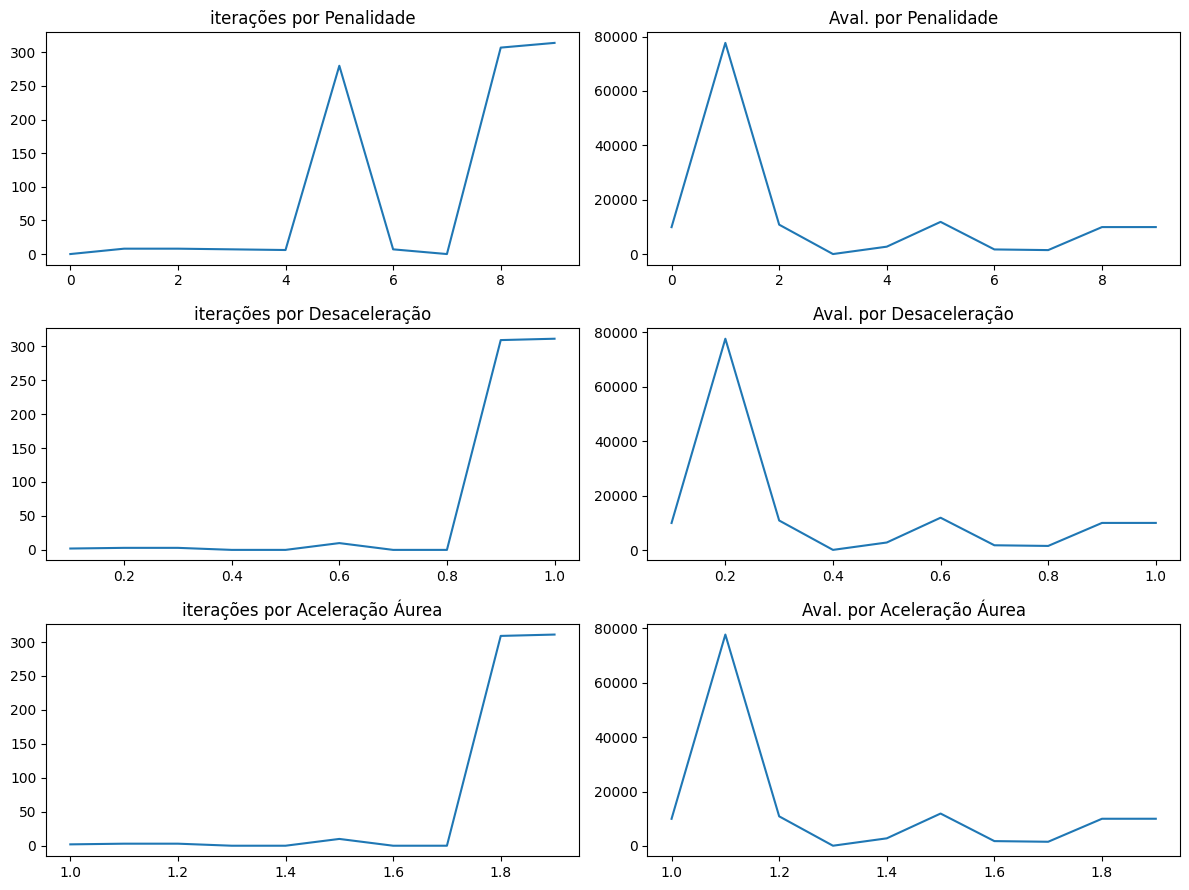

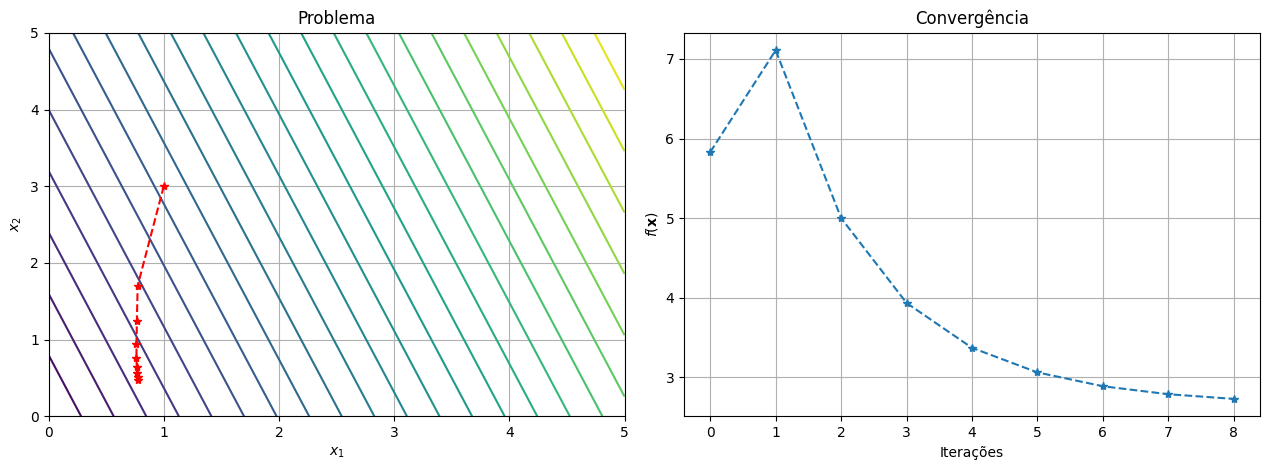

Solução ótima: [0.77788201 0.47797759]
Número de iterações: 8
Número de avaliações: 11191
Valor da função objetivo: 2.7267


In [18]:
busca_1d = otimo.SecaoAurea(precisao=1e-6, aceleracao=1.1)
irrestrito = otimo.Gradiente(busca_1d, precisao=1e-6)
restrito = otimo.PenalidadeInterior()

resultados_1 = np.zeros([10, 3])
resultados_2 = np.zeros([10, 3])
resultados_3 = np.zeros([10, 3])

for i in range(10):
    penalidade = 1*i;
    desaceleracao = 0.1 + 0.1 * i

    sol_1 = restrito.resolva(objective, x0,  restrictions, tipos_de_restricoes, irrestrito, disp=False, penalidade=penalidade)
    sol_2 = restrito.resolva(objective, x0,  restrictions, tipos_de_restricoes, irrestrito, disp=False, desaceleracao=desaceleracao)
    
    busca_1d = otimo.SecaoAurea(precisao=1e-6, aceleracao=1 + 0.1*i)
    irrestrito = otimo.Gradiente(busca_1d, precisao=1e-6)

    sol_3 = restrito.resolva(objective, x0,  restrictions, tipos_de_restricoes, irrestrito, disp=False, desaceleracao=0.5, penalidade=3 )
    
    resultados_1[i] = np.array([penalidade, sol_1.iter, sol_2.aval])
    resultados_2[i] = np.array([desaceleracao, sol_2.iter, sol_2.aval])
    resultados_3[i] = np.array([1 + 0.1*i, sol_2.iter, sol_2.aval])

    print([sol_1.criterio_parada, sol_2.criterio_parada, sol_3.criterio_parada])
    


def plot_res(resultados, variavel, axs):

    axs[0].plot(resultados[:, 0], resultados[:, 1], )
    axs[0].set_title(f"iterações por {variavel}")

    axs[1].plot(resultados[:, 0], resultados[:, 2])
    axs[1].set_title(f"Aval. por {variavel}")



fig, axs = plt.subplots(3, 2)
fig.set_size_inches(12, 9)

plot_res(resultados_1, "Penalidade", axs[0])
plot_res(resultados_2, "Desaceleração", axs[1])
plot_res(resultados_3, "Aceleração Áurea", axs[2])

fig.tight_layout()
plt.show()

busca_1d = otimo.SecaoAurea(precisao=1e-6, aceleracao=1.3, )
irrestrito = otimo.Gradiente(busca_1d, precisao=1e-6, )
restrito = otimo.PenalidadeInterior()

solf = restrito.resolva(objective, x0,  restrictions, tipos_de_restricoes, irrestrito, disp=False, desaceleracao=0.4, penalidade=6 )
solf.resultados(objective, [0, 5], [0,5])
print(solf)

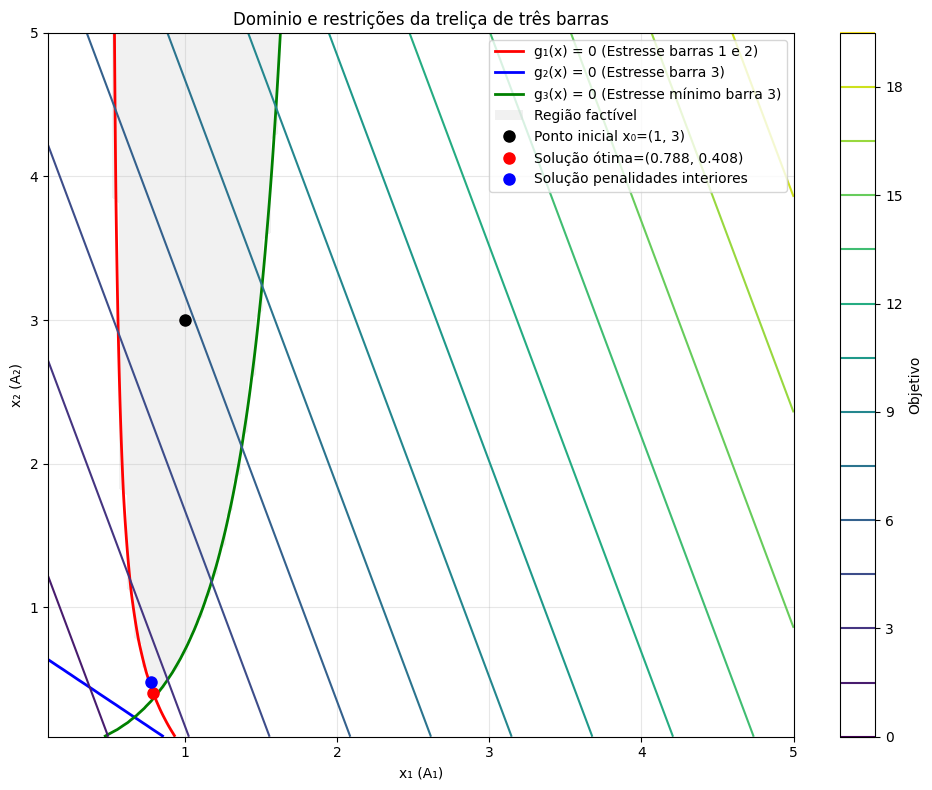

In [20]:

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8))

x0 = np.array([1, 3]);
# Plot constraint boundaries (where g(x) = 0)
contour1 = ax.contour(X1, X2, G1, levels=[0], colors='red', linestyles='-', linewidths=2)
contour2 = ax.contour(X1, X2, G2, levels=[0], colors='blue', linestyles='-', linewidths=2)
contour3 = ax.contour(X1, X2, G3, levels=[0], colors='green', linestyles='-', linewidths=2)

obj_contour = ax.contour(X1, X2, O, levels=15)

# Fill feasible regions (where all constraints are satisfied)
feasible = (G1 <= 0) & (G2 <= 0) & (G3 <= 0)
ax.contourf(X1, X2, feasible.astype(int), levels=[0.5, 1.5], colors=['lightgray'], alpha=0.3)
# Add labels and formatting
ax.set_xlabel('x₁ (A₁)')
ax.set_ylabel('x₂ (A₂)')
ax.set_title('Dominio e restrições da treliça de três barras')
ax.grid(True, alpha=0.3)

# Add legend
ax.plot([], [], 'r-', linewidth=2, label='g₁(x) = 0 (Estresse barras 1 e 2)')
ax.plot([], [], 'b-', linewidth=2, label='g₂(x) = 0 (Estresse barra 3)')
ax.plot([], [], 'g-', linewidth=2, label='g₃(x) = 0 (Estresse mínimo barra 3)')
ax.fill([], [], 'lightgray', alpha=0.3, label='Região factível')
ax.plot
ax.legend()

# Mark the initial point
ax.plot(x0[0], x0[1], 'ko', markersize=8, label=f'Ponto inicial x₀=({x0[0]}, {x0[1]})')

# Mark the optimal solution
ax.plot(resultado.x[0], resultado.x[1], 'ro', markersize=8, label=f'Solução ótima=({resultado.x[0]:.3f}, {resultado.x[1]:.3f})')
ax.plot(solf.x[0], solf.x[1], 'bo', markersize=8, label=f'Solução penalidades interiores')
ax.legend()
plt.colorbar(obj_contour, label="Objetivo")
plt.tight_layout()
plt.show()